In [95]:
#columns = firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pyplot as plt
df = pd.read_csv("us2022q2a.csv")
df_additional = pd.read_csv("usfirms2022.csv", usecols=["Ticker", "Sector NAICS\nlevel 1", "Name"])
df = df.join(df_additional.set_index("Ticker"), on="firm")
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324445,ZYNE,2022q2,0.0,0.0,9.168770e+03,0.0,-775.927860,-91.691,0.0,67006.959,...,237.414,57241.873,1.140000,1.1400,43595.959,6.0,2022.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [96]:
df.dropna(thresh=8, inplace=True) #8 are the columns that the dataset keeps even if the organisation was not operational + 1
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\nlevel 1
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0,"Agilent Technologies, Inc",Manufacturing
1,A,2000q2,2485000.0,1261000.0,1.010000e+06,0.0,42000.000000,0.000,90000.0,7321000.000,...,0.000,4642000.000,45.215607,73.7500,452271.967,6.0,2000.0,2.0,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000.0,1369000.0,1.091000e+06,0.0,28000.000000,0.000,83000.0,7827000.000,...,0.000,4902000.000,30.003238,48.9375,453014.579,9.0,2000.0,3.0,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000.0,1732000.0,1.182000e+06,0.0,10000.000000,0.000,163000.0,8425000.000,...,0.000,5265000.000,33.566841,54.7500,456366.381,12.0,2000.0,4.0,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000.0,1449000.0,1.113000e+06,0.0,-6000.000000,0.000,119000.0,9208000.000,...,0.000,5541000.000,18.840347,30.7300,456769.737,3.0,2001.0,1.0,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324441,ZYNE,2021q2,0.0,0.0,9.838494e+03,0.0,-117.528220,-5.943,0.0,98195.904,...,468.385,87699.257,5.290000,5.2900,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324442,ZYNE,2021q3,0.0,0.0,1.021065e+04,0.0,-376.636750,-5.038,0.0,89996.170,...,411.237,78686.999,4.240000,4.2400,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324443,ZYNE,2021q4,0.0,0.0,8.836436e+03,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.880000,2.8800,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
324444,ZYNE,2022q1,0.0,0.0,8.903915e+03,0.0,317.252110,-96.044,0.0,74381.029,...,295.754,65166.970,2.050000,2.0500,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [97]:
df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm'], inplace=True)

In [98]:
#nuevas variables usadas en el ejercicio

df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['lrevenue'] = df.groupby(['firm'])['revenue'].shift(4)
df['ebit'] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df['lebit'] = df.groupby(['firm'])['ebit'].shift(4)
df['netincome'] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"] - df["incometax"] - df["finexp"] + df["extraincome"]
df["bookvalue"] = df["totalassets"] - df["totalliabilities"]
df["marketvalue"] = df["originalprice"] * df["sharesoutstanding"]
df["ccstockreturns"] = np.log(df["adjprice"]) - np.log(df["adjprice"].shift(4))
df["f1"] = df["ccstockreturns"].shift(-1)
df[['q', "Sector NAICS\nlevel 1",'adjprice', 'lprice', 'revenue', 'lrevenue', 'ebit', 'lebit', "ccstockreturns", "f1", "bookvalue", "marketvalue", "netincome"]].head()

,q,Sector NAICS\nlevel 1,adjprice,lprice,revenue,lrevenue,ebit,lebit,ccstockreturns,f1,bookvalue,marketvalue,netincome
firm,,,,,,,,,,,,,
A,2000q1,Manufacturing,63.761670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.700800e+07,NaN
A,2000q2,Manufacturing,45.215607,NaN,2485000.0,NaN,214000.0,NaN,NaN,NaN,4642000.0,3.335506e+07,166000.0
A,2000q3,Manufacturing,30.003238,NaN,2670000.0,NaN,210000.0,NaN,NaN,NaN,4902000.0,2.216940e+07,155000.0
A,2000q4,Manufacturing,33.566841,NaN,3372000.0,NaN,458000.0,NaN,NaN,-1.219152,5265000.0,2.498606e+07,305000.0
A,2001q1,Manufacturing,18.840347,63.76167,2841000.0,NaN,279000.0,NaN,-1.219152,-0.819441,5541000.0,1.403653e+07,154000.0


In [99]:
# firm size variable dark magic

def condition(row):
	if row["marketvalue"] > row["second_third"]:
		return "Big"
	elif row["marketvalue"] < row["first_third"]:
		return "Small"
	else:
		return "Medium"	

first_third, second_third = df.groupby("q")["marketvalue"].quantile(0.333), df.groupby("q")["marketvalue"].quantile(0.666)
first_third, second_third = pd.DataFrame(first_third), pd.DataFrame(second_third)

first_third.rename(columns = {"marketvalue": "first_third"}, inplace=True)
second_third.rename(columns = {"marketvalue": "second_third"}, inplace=True)
first_third.reset_index(inplace=True)
second_third.reset_index(inplace=True)

thirds = first_third.join(second_third.set_index("q"), on="q")
df = df.join(thirds.set_index("q"), on="q")

df["size"] = df.apply(condition, axis=1)

df.groupby("q")["size"].value_counts()

q       size  
2000q1  Medium     280
        Big        208
        Small      208
2000q2  Medium     294
        Big        210
                  ... 
2022q1  Big       1188
        Small     1184
2022q2  Medium    1222
        Big       1187
        Small     1183
Name: size, Length: 270, dtype: int64

In [100]:

df_by_year = df.groupby(["firm", np.arange(len(df))//4]).agg({"qdate": "first", "revenue": "sum","cogs":"sum", "sgae": "sum", "otheropexp": "sum", "extraincome": "sum", "finexp": "sum","incometax": "sum", "totalassets": "last", "totalliabilities": "last", "shortdebt": "last", "longdebt": "last", "stockholderequity": "last", "adjprice": "last", "originalprice": "last", "sharesoutstanding": "last", "bookvalue": "last", "marketvalue": "last", "Name": "first", "Sector NAICS\nlevel 1": "first", "lprice": "last", "lrevenue": "sum", "ebit": "sum", "lebit": "sum", "size": "last" }).copy()
df_by_year.reset_index(inplace=True)
df_by_year['qdate'] = df_by_year['qdate'].astype(str).str[0:4]
df_by_year.set_index(['firm','qdate'], inplace=True)
df_by_year.drop(["level_1"], axis=1, inplace=True)
last_year = df_by_year.groupby("firm").last()
last_year.head()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,sharesoutstanding,bookvalue,marketvalue,Name,Sector NAICS\nlevel 1,lprice,lrevenue,ebit,lebit,size
firm,,,,,,,,,,,,,,,,,,,,,
A,3281000.0,1510000.0,1035000.0,0.0,-44000.0,40000.0,95000.0,10455000.0,5333000.0,175000.0,...,298708.056,5122000.0,3.547756e+07,"Agilent Technologies, Inc",Manufacturing,146.747733,3073000.0,736000.0,616000.0,Big
AA,6937000.0,4948000.0,433000.0,50000.0,11000.0,55000.0,444000.0,15709000.0,8417000.0,1000.0,...,184448.686,7292000.0,8.407171e+06,Alcoa Corp,Manufacturing,36.582200,5703000.0,1506000.0,753000.0,Big
AAIC,31855.0,15523.0,0.0,0.0,-10809.0,0.0,4333.0,1084755.0,871057.0,NaN,...,35016.392,213698.0,1.138033e+05,Arlington Asset Investment Corp,Finance and Insurance,4.060000,28211.0,16332.0,19037.0,Small
AAL,22321000.0,0.0,23027000.0,0.0,117000.0,894000.0,-324000.0,67963000.0,76385000.0,2106000.0,...,649514.848,-8422000.0,8.235848e+06,American Airlines Group Inc,Transportation and Warehousing,21.210000,11486000.0,-706000.0,-874000.0,Big
AAME,195299.0,0.0,191523.0,0.0,0.0,0.0,863.0,379274.0,270173.0,NaN,...,20398.497,109101.0,5.446399e+04,Atlantic American Corp,Finance and Insurance,4.296295,206733.0,3776.0,20656.0,Small


In [101]:
last_year["operatingmargin"] = (last_year["revenue"] - last_year["cogs"] - last_year["sgae"] - last_year["otheropexp"]) / last_year["revenue"] 
last_year.replace([-np.inf, np.inf], np.nan, inplace=True)
last_year[["Sector NAICS\nlevel 1", "revenue", "cogs", "sgae", "otheropexp", "operatingmargin"]]

,Sector NAICS\nlevel 1,revenue,cogs,sgae,otheropexp,operatingmargin
firm,,,,,,
A,Manufacturing,3281000.0,1510000.0,1.035000e+06,0.0,0.224322
AA,Manufacturing,6937000.0,4948000.0,4.330000e+05,50000.0,0.217097
AAIC,Finance and Insurance,31855.0,15523.0,0.000000e+00,0.0,0.512698
AAL,Transportation and Warehousing,22321000.0,0.0,2.302700e+07,0.0,-0.031629
AAME,Finance and Insurance,195299.0,0.0,1.915230e+05,0.0,0.019334
...,...,...,...,...,...,...
ZVIA,Manufacturing,45542.0,28168.0,2.407400e+04,8043.0,-0.323723
ZVO,Educational Services,167775.0,112367.0,8.171900e+04,5453.0,-0.189325
ZWS,Manufacturing,284200.0,170400.0,6.000000e+04,300.0,0.188248


# 2.2.1 About descriptive statistics:

## 2.2.1.1 Considering the most recent financial quarter of the dataset:
### Show how many firms by industry there are in the sample

In [102]:
industries_last_year = last_year.groupby("Sector NAICS\nlevel 1")
count_industries = industries_last_year["Sector NAICS\nlevel 1"].count().sort_values(ascending=False)
count_industries = pd.concat([pd.Series([count_industries.sum()], index=["General"]) ,count_industries])
count_industries

General                                                                     3599
Manufacturing                                                               1564
Finance and Insurance                                                        701
Information                                                                  261
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                103
Wholesale Trade                                                               79
Utilities                                                                     77
Accommodation and Food Services                                               69
Transportation and Warehousing                                                69
Real Estate and Rental and L

### For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [103]:
bookvalue_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["bookvalue"].describe()
bookvalue_general = last_year["bookvalue"].describe().rename("General")
bookvalue_last_quarter = pd.concat([bookvalue_general.to_frame().T, bookvalue_last_quarter])
bookvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,3572.0,3.320027e+06,1.550239e+07,-14791000.0,9.730125e+04,430966.0,1728517.75,461229000.0
-,1.0,5.704446e+06,NaN,5704446.0,5.704446e+06,5704446.0,5704446.00,5704446.0
Accommodation and Food Services,69.0,5.019630e+05,2.440004e+06,-8658900.0,1.072699e+04,231685.0,954019.00,7289000.0
Administrative and Support and Waste Management and Remediation Services,133.0,2.644816e+06,7.100139e+06,-1715647.0,7.536500e+04,515665.0,1856100.00,46515000.0
"Agriculture, Forestry, Fishing and Hunting",16.0,3.406701e+06,6.635579e+06,14751.0,2.128192e+05,1068506.5,3222425.00,26071000.0
"Arts, Entertainment, and Recreation",21.0,5.061617e+06,2.096327e+07,-1081020.0,-1.053470e+05,76168.0,1678528.00,96433000.0
Construction,45.0,2.483906e+06,4.236454e+06,83162.0,4.073750e+05,963495.0,2488619.00,21789774.0
Educational Services,14.0,8.931767e+05,1.110081e+06,6605.0,2.377335e+05,649699.0,966118.00,4322243.0
Finance and Insurance,698.0,5.261688e+06,2.021463e+07,-5438611.0,2.826865e+05,1005710.0,3256684.50,286143000.0
Health Care and Social Assistance,64.0,1.032707e+06,1.861076e+06,-1656000.0,7.764775e+04,444065.5,1161768.25,10400700.0


<AxesSubplot:>

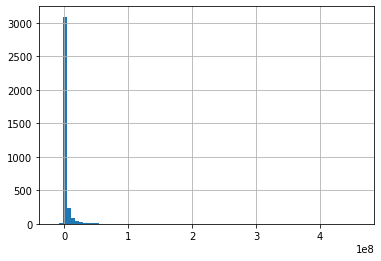

In [104]:
last_year["bookvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

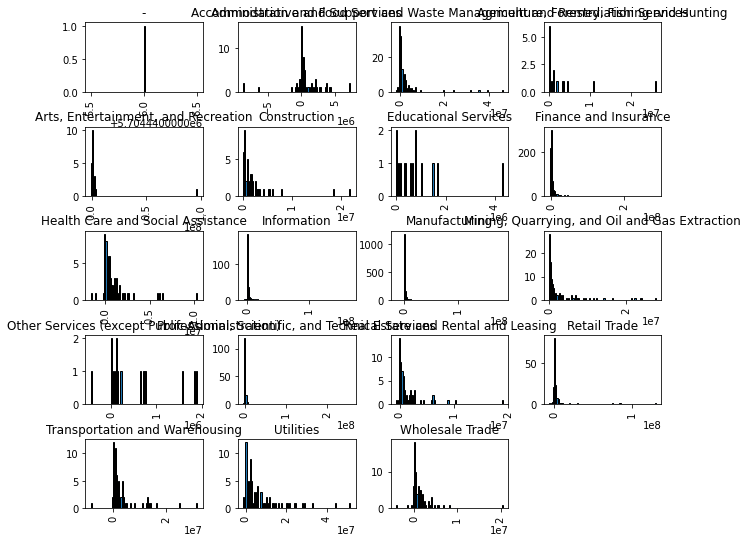

In [105]:
last_year["bookvalue"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=100)

In [106]:
marketvalue_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["marketvalue"].describe()
marketvalue_general = last_year["marketvalue"].describe().rename("General")
marketvalue_last_quarter = pd.concat([marketvalue_general.to_frame().T, marketvalue_last_quarter])
marketvalue_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,3571.0,1.107178e+07,6.684700e+07,3.490000e+01,1.905136e+05,1.100291e+06,4.584613e+06,2.212838e+09
-,1.0,4.865183e+06,NaN,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06,4.865183e+06
Accommodation and Food Services,69.0,8.681070e+06,2.507255e+07,1.104731e+04,2.792043e+05,1.394617e+06,5.181216e+06,1.816339e+08
Administrative and Support and Waste Management and Remediation Services,132.0,1.376494e+07,4.461001e+07,6.078575e+03,5.259900e+05,1.928296e+06,5.986456e+06,3.743426e+08
"Agriculture, Forestry, Fishing and Hunting",16.0,8.046780e+06,1.457197e+07,2.218892e+04,2.645742e+05,1.264045e+06,5.211223e+06,4.505560e+07
"Arts, Entertainment, and Recreation",21.0,1.278260e+07,3.685083e+07,7.425361e+03,1.146178e+06,2.504698e+06,8.776708e+06,1.719481e+08
Construction,45.0,3.857422e+06,5.646435e+06,2.026958e+04,6.271708e+05,1.745045e+06,3.456494e+06,2.330088e+07
Educational Services,14.0,1.302581e+06,1.039264e+06,3.307650e+04,2.528720e+05,1.524843e+06,1.869224e+06,3.044160e+06
Finance and Insurance,698.0,8.320302e+06,2.904535e+07,5.430963e+03,3.549129e+05,1.248435e+06,4.736472e+06,4.818731e+08
Health Care and Social Assistance,64.0,3.492004e+06,6.973706e+06,6.955542e+03,1.530626e+05,1.378546e+06,4.291806e+06,4.965911e+07


<AxesSubplot:>

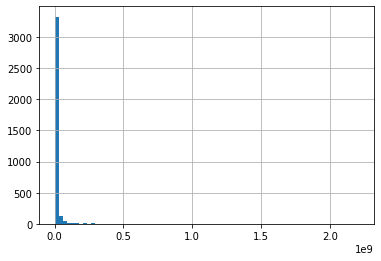

In [107]:
last_year["marketvalue"].hist(bins=75)

array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

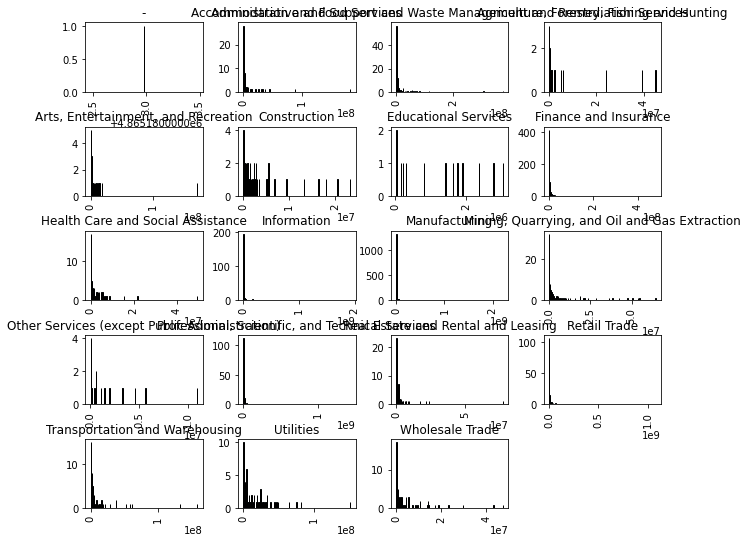

In [108]:
last_year["marketvalue"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=250)

SE PUEDE VER EN LAS INDUSTRIAS CON UN BUEN NÚMERO DE EMPRESAS QUE EN LAS DOS MÉTRICAS SE TIENE UNA DISTRIBUCIÓN NORMAL SESGADA A LA DERECHA. POR ESTA MISMA RAZÓN, SE TIENE UNA IDEA MÁS CLARA DE LA EMPRESA TÍPICA SI NOS BASAMOS EN LA MEDIANA EN VEZ DE LA MEDIA. 

LA INDUSTRIA CON MÁS EMPRESAS ES MANUFACTURING, LA CUAL CUBRE MÁS DE 50% DE LAS EMPRESAS; LA QUE TIENE MENOS ES OTHER EDUCATIONAL SERVICES CON 14. 

LA INDUSTRIA CON MAYOR MEDIANA EN MARKET VALUE ES UTILITIES CON 6 MIL MILLONES, EN BOOK VALUE ES IGUALMENTE UTILITIES CON 2.8 MIL MILLONES; EN ESTE PUNTO SE PUEDE VER COMO ESTAS DOS MÉTRICAS ESTÁN CORRELACIONADAS.

EN BOOK VALUE SE PUEDE VER QUE LA EMPRESA TÍPICA DE CUALQUIER INDUSTRIA ESTÁ ENTRE 70 MILLONES Y 2.8 MIL MILLONES (ARTES QUE ES EL MENOR CON 70 MILLONES ES UN VALOR ATÍPICO, PROBABLEMENTE POR NO CONTAR CON BASTANTES ACTIVOS). 

EN MARKET VALUE ENTRE 850 MILLONES Y 6 MIL MILLONES. 
EN MARKET VALUE LA INDUSTRIA CON MAYOR DESVIACIÓN ESTÁNDAR ES "PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES" CON 124 MIL MILLONES Y LA MENOR ES EDUCATIONAL SERVICES CON MIL MILLONES. 

EN BOOK VALUE LA MAYOR ES IGUALMENTE "PROFESSIONAL, SCIENTIFIC AND TECHNICAL SERVICES" CON 23 MIL MILLONES Y LA MENOR ES OTHER SERVICES CON 700 MILLONES.

### For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries. 

In [109]:
last_year.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()

operatingmargin_last_quarter = last_year.groupby("Sector NAICS\nlevel 1")["operatingmargin"].describe()
operatingmargin_general = last_year["operatingmargin"].describe().rename("General")
operatingmargin_last_quarter = pd.concat([operatingmargin_general.to_frame().T, operatingmargin_last_quarter])
operatingmargin_last_quarter

,count,mean,std,min,25%,50%,75%,max
General,3261.0,-6.951623,87.710532,-2784.205882,-0.083942,0.080293,0.225371,81.792528
-,1.0,0.464929,NaN,0.464929,0.464929,0.464929,0.464929,0.464929
Accommodation and Food Services,69.0,0.073854,0.167700,-0.593442,0.012986,0.080123,0.165414,0.427609
Administrative and Support and Waste Management and Remediation Services,130.0,-2.315621,25.157065,-286.495298,-0.017782,0.074515,0.157067,0.978472
"Agriculture, Forestry, Fishing and Hunting",15.0,-0.046202,0.332266,-1.187624,-0.049244,0.025447,0.106556,0.207740
"Arts, Entertainment, and Recreation",21.0,-0.096857,0.527622,-1.676287,-0.036147,0.112280,0.169544,0.342833
Construction,45.0,0.198439,0.666264,-0.200776,0.035356,0.099345,0.171117,4.515059
Educational Services,14.0,0.032346,0.142753,-0.212541,0.004013,0.062876,0.103486,0.250763
Finance and Insurance,683.0,0.538358,0.557252,-3.427196,0.179398,0.613611,0.926810,7.453061
Health Care and Social Assistance,60.0,-6.935511,38.831070,-279.000000,-0.330001,-0.007343,0.100401,16.009749


array([[<AxesSubplot:title={'center':'-'}>,
        <AxesSubplot:title={'center':'Accommodation and Food Services'}>,
        <AxesSubplot:title={'center':'Administrative and Support and Waste Management and Remediation Services'}>,
        <AxesSubplot:title={'center':'Agriculture, Forestry, Fishing and Hunting'}>],
       [<AxesSubplot:title={'center':'Arts, Entertainment, and Recreation'}>,
        <AxesSubplot:title={'center':'Construction'}>,
        <AxesSubplot:title={'center':'Educational Services'}>,
        <AxesSubplot:title={'center':'Finance and Insurance'}>],
       [<AxesSubplot:title={'center':'Health Care and Social Assistance'}>,
        <AxesSubplot:title={'center':'Information'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Mining, Quarrying, and Oil and Gas Extraction'}>],
       [<AxesSubplot:title={'center':'Other Services (except Public Administration)'}>,
        <AxesSubplot:title={'center':'Professional, Scien

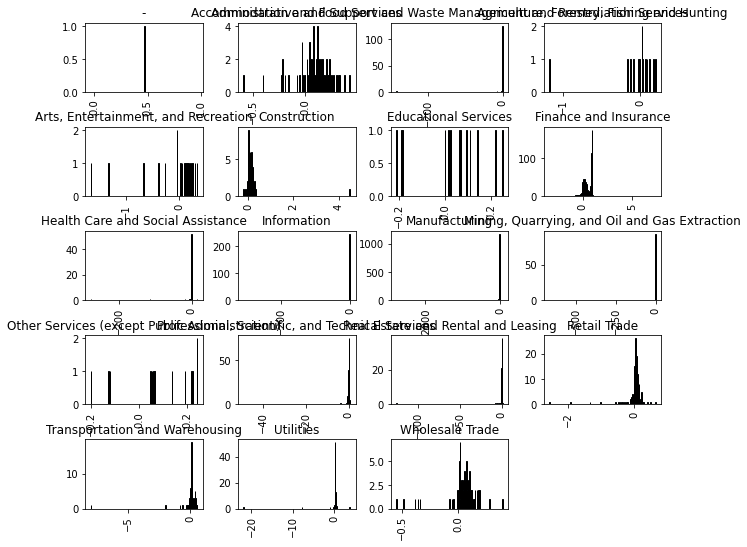

In [110]:
last_year["operatingmargin"].hist(by=last_year["Sector NAICS\nlevel 1"], figsize=(10,9), ec="k", bins=150)

SE PUEDE VER QUE LA DISTRIBUCIÓN POR INDUSTRIA SE VE MÁS NORMAL QUE EN LAS MÉTRICAS ANTERIORES (AUNQUE SE PUEDE NOTAR UN POCO DE SESGO, ESTA VEZ A LA IZQUIERDA). EN LA MAYORÍA DE LAS EMPRESAS HAY UNA MEDIANA LIGERAMENTE ENCIMA DEL 0. POR LA FORMA EN QUE FUNCIONA LA FÓRMULA, LOS VALORES EXTREMOS POR EL LADO DERECHO SE ACABAN ANTES DEL 1 POR LO QUE NO CAMBIAN MUCHO EL PROMEDIO PERO DEL LADO IZQUIERDO SE PUEDEN VER ALGUNOS VALORES MUY EXTREMOS COMO EN EL CASO DE INFORMATION O MANUFACTURING. SI NOS BASAMOS EN LA MEDIANA, PODEMOS DECIR QUE LA ÚNICA INDUSTRIA EN QUE LA EMPRESA TIPICA TIENE UN MAL OPERATING MARGIN ES INFORMATION (ESTO ES PORQUE TIENEN UN OPERATING MARGIN NEGATIVO). TAMBIÉN SE PUEDE DECIR QUE LA MAYORÍA DE LAS EMPRESAS EN FINANCE TIENEN MUY BUEN OPERATING MARGIN PORQUE ES DE LAS POCAS INDUSTRIAS QUE TIENE UN VALOR POSITIVO EN 25% Y TIENE DE LOS MEJORES MARGENES EN 50% Y 75%.

### Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [111]:
sorted_market_value = last_year.sort_values(by=["marketvalue"], ascending=False)
top_ten_market_value = sorted_market_value.head(10)["marketvalue"]
top_ten_market_value

firm
AAPL     2.212838e+09
MSFT     1.920840e+09
GOOGL    1.435042e+09
AMZN     1.080624e+09
TSLA     6.976698e+08
BRK_A    6.015139e+08
UNH      4.818731e+08
JNJ      4.671001e+08
META     4.363946e+08
NVDA     3.789750e+08
Name: marketvalue, dtype: float64

<AxesSubplot:>

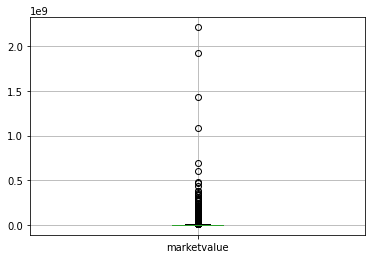

In [112]:
last_year.boxplot(column=["marketvalue"])

In [113]:
last_year["marketvalue"].describe()

count    3.571000e+03
mean     1.107178e+07
std      6.684700e+07
min      3.490000e+01
25%      1.905136e+05
50%      1.100291e+06
75%      4.584613e+06
max      2.212838e+09
Name: marketvalue, dtype: float64

In [114]:
(top_ten_market_value - last_year["marketvalue"].median()) / last_year["marketvalue"].std()

firm
AAPL     33.086568
MSFT     28.718416
GOOGL    21.451109
AMZN     16.149174
TSLA     10.420356
BRK_A     8.981909
UNH       7.192138
JNJ       6.971141
META      6.511801
NVDA      5.652830
Name: marketvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A MARKET VALUE ES APPLE. EL VALOR DEL TOP 3 ESTÁ ARRIBA DE 10 DESVIACIONES ESTÁNDAR, CONSIDERANDO QUE EN LA DISTRIBUCIÓN NORMAL 3 DESVIACIONES ESTÁNDAR DE ARRIBA Y ABAJO SON EL 99.73%, ESTAS EMPRESAS SON TOTALMENTE FUERA DE SERIE EN LA INDUSTRIA

### Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [115]:
sorted_book_value = last_year.sort_values(by=["bookvalue"], ascending=False)
top_ten_book_value = sorted_book_value.head(10)["bookvalue"]
top_ten_book_value

firm
BRK_A    461229000.0
JPM      286143000.0
BAC      269118000.0
GOOGL    255419000.0
C        199626000.0
XOM      184508000.0
WFC      179793000.0
MSFT     166542000.0
CVX      154562000.0
T        135307000.0
Name: bookvalue, dtype: float64

<AxesSubplot:>

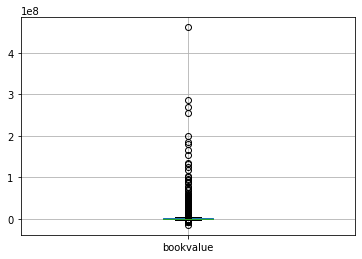

In [116]:
last_year.boxplot(column=["bookvalue"])

In [117]:

last_year["bookvalue"].describe()

count    3.572000e+03
mean     3.320027e+06
std      1.550239e+07
min     -1.479100e+07
25%      9.730125e+04
50%      4.309660e+05
75%      1.728518e+06
max      4.612290e+08
Name: bookvalue, dtype: float64

In [118]:
(top_ten_book_value - last_year["bookvalue"].median()) / last_year["bookvalue"].std()

firm
BRK_A    29.724325
JPM      18.430194
BAC      17.331976
GOOGL    16.448306
C        12.849312
XOM      11.874108
WFC      11.569961
MSFT     10.715190
CVX       9.942405
T         8.700339
Name: bookvalue, dtype: float64

LA MEJOR EMPRESA EN CUANTO A BOOKVALUE ES BERKSHIRE HATHAWAY A. SE PUEDE NOTAR QUE BOOKVALUE TIENE LOS VALORES MÁXIMOS A MENOS DESVIACIONES ESTÁNDAR, TAMBIÉN SE PUEDE NOTAR QUE LOS VALORES ESTÁN MÁS JUNTOS POR LO QUE TAL VEZ ESTÁ MENOS SESGADA A LA DERECHA. LA EXPLICACIÓN PROBABLE DE ESTO ES QUE LOS VALORES DE LIBRO SON MÁS ESTÁTICOS COMPARADOS CON LAS ACCIONES QUE PUEDEN SER MÁS VOLÁTILES

## 2.2.1.2 Considering the whole history of financial data for all firms:
### How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [119]:
lrevenue_tmp = df["lrevenue"].replace(0, np.nan)
df["salesannualgrowth"] = (df["revenue"] / lrevenue_tmp) -1
df["salesannualgrowth"].replace([-np.inf, np.inf], np.nan, inplace=True)
df.groupby(["firm"])["salesannualgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,82.0,-0.003335,0.185153,-0.507711,-0.041799,0.035665,0.084006,0.350471
AA,20.0,0.074995,0.219242,-0.271531,-0.121126,0.145556,0.257040,0.396321
AAIC,74.0,-0.176807,1.647991,-12.573114,-0.439148,0.092438,0.301386,4.114294
AAL,86.0,0.116684,0.523062,-0.864381,-0.016623,0.042147,0.094297,3.610358
AAME,41.0,0.052295,0.126377,-0.283689,-0.013666,0.050590,0.146168,0.357129
...,...,...,...,...,...,...,...,...
ZVIA,1.0,0.325745,NaN,0.325745,0.325745,0.325745,0.325745,0.325745
ZVO,41.0,-0.122689,0.107740,-0.412065,-0.149543,-0.097619,-0.054630,0.068459
ZWS,37.0,-0.086720,0.433378,-2.510400,-0.048450,0.009333,0.033701,0.265420


In [120]:
lebit_tmp = df["lebit"].replace(0, np.nan)
df["operatingprofitgrowth"] = df["ebit"] / lebit_tmp
df.groupby(["firm"])["operatingprofitgrowth"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,82.0,-0.444224,12.854719,-115.000000,0.593741,1.018056,1.325004,5.629032
AA,20.0,0.991490,6.919098,-19.227273,-0.292095,1.005523,1.884236,21.600000
AAIC,74.0,1.040112,1.269475,-1.660519,0.565837,0.915301,1.294942,7.474042
AAL,86.0,0.703225,8.192100,-42.882353,-0.176635,0.748344,1.325286,53.666667
AAME,41.0,1.681060,4.044801,-6.939671,0.053486,0.590182,1.990536,18.302594
...,...,...,...,...,...,...,...,...
ZVIA,1.0,20.852900,NaN,20.852900,20.852900,20.852900,20.852900,20.852900
ZVO,41.0,-0.287902,4.379763,-18.639896,-0.259973,0.351485,0.915044,13.582500
ZWS,37.0,0.821474,1.054277,-3.302000,0.676289,1.049465,1.138060,3.497076


In [121]:
bookvalue_tmp = df["bookvalue"].replace(0, np.nan)
df["booktomarketratio"] = df["marketvalue"] / bookvalue_tmp
df.groupby(["firm"])["booktomarketratio"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,89.0,4.031964,1.644854,1.218792,2.923503,3.759661,4.574511,9.641711
AA,23.0,1.001523,0.541860,0.197081,0.668775,0.854401,1.235776,2.667706
AAIC,77.0,0.991386,0.500842,0.261631,0.674907,0.863080,1.062128,2.680216
AAL,35.0,-22.034220,114.572674,-659.366959,-1.942174,-0.977897,6.366372,75.055871
AAME,44.0,0.613940,0.177687,0.273020,0.479899,0.611991,0.755520,1.000387
...,...,...,...,...,...,...,...,...
ZVIA,4.0,4.123944,1.953162,2.165834,2.976620,3.800278,4.947602,6.729385
ZVO,44.0,1.779457,0.914594,0.476628,1.131696,1.530986,2.212735,5.007797
ZWS,41.0,5.011056,6.038356,1.986670,2.526164,3.407289,4.864945,34.945588


Escogí sales annual growth, operating profit growth y book to market ratio. Escogí las primeras dos porque nos indican cómo cambian las ganancias de la empresa a través del tiempo. Book to market ratio se podría interpretar como que están sacando más ganancia de menos recursos

### Calculate and explain earnings per share deflated by price.

In [122]:
df["epsp"] = (df["netincome"] / df["sharesoutstanding"]) / df["originalprice"]
df.groupby(["firm"])["epsp"].describe()

,count,mean,std,min,25%,50%,75%,max
firm,,,,,,,,
A,87.0,0.006714,0.028015,-0.148001,0.006304,0.008557,0.011181,0.173107
AA,23.0,-0.004386,0.046148,-0.094271,-0.031117,0.008580,0.028508,0.069854
AAIC,77.0,-0.111707,1.207521,-9.910640,-0.049653,0.013154,0.038973,3.189644
AAL,35.0,-0.035834,0.145175,-0.431488,0.004481,0.021502,0.034171,0.122910
AAME,44.0,0.020351,0.065314,-0.187525,0.002951,0.015765,0.034333,0.281737
...,...,...,...,...,...,...,...,...
ZVIA,4.0,-0.043385,0.011082,-0.058721,-0.047900,-0.040027,-0.035512,-0.034767
ZVO,44.0,-0.046185,0.128111,-0.555469,-0.051377,-0.001168,0.019513,0.096468
ZWS,41.0,0.007375,0.010316,-0.025814,0.004470,0.010575,0.012219,0.030176


Esta métrica nos da una idea de qué tan bien va una acción, el dividirlo por el stock price nos permite que no esté a merced de si se dividen las acciones 

# 2.2.2 About statistical modeling

### You have to select a group of firms according to their general industry classification:
### Manufacturing

### Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

DV: Continously compounded stock return
IV: Operating profit growth, book to market value, short debts

-Operating profit growth: Uno de los problemas de las variables originales es que solo muestran el estado actual mientras que percibo que el cc stock return depende de qué tanto está creciendo la empresa, este factor me parece el que mejor representa si la empresa está creciendo

-Book to market ratio: Investigando sobre esta variable descubrí que se puede entender que un ratio menor a 1 nos dice que el stock está infravalorado y mayor a 1 que está sobrevalorado, se podría esperar que si uno de estos casos es verdad el mercado se va a dar cuenta y va a estabilizar el stock. ¿Por qué manejo una interpretación distinta en esta sección comparada con la anterior? Algunas industrias que no tienen tantos assets (como finanzas o artes que vimos en un ejemplo anterior) no es muy buena métrica porque no se utilizan bastante assets como fábricas o maquinarias, en cambio en manufactura es una parte esencial del negocio

-Short finacial leverage: Esta es de la que estoy menos seguro pero tengo la hipótesis que se necesita contraer deuda para poder hacer crecer la empresa, más en una industria que depende de los assets como manufactura. Pongo short en vez de long porque va a ser más seguro de determinar cuando va a tener impacto algo que se va a pagar en 20 años.

In [123]:
df = pd.get_dummies(df, columns=["size"], drop_first=True)

In [124]:
totalassets_tmp = df["totalassets"].replace(0, np.nan)
df["shortfinancialleverage"] = df["shortdebt"] / totalassets_tmp
df_manufacturing = df[df["Sector NAICS\nlevel 1"] == "Manufacturing"].copy()
df_manufacturing.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,f1,first_third,second_third,salesannualgrowth,operatingprofitgrowth,booktomarketratio,epsp,size_Medium,size_Small,shortfinancialleverage
count,6.301900e+04,6.298500e+04,6.298500e+04,6.298500e+04,6.301900e+04,6.301900e+04,6.301900e+04,6.347400e+04,6.347400e+04,6.330600e+04,...,63501.000000,6.588600e+04,6.588600e+04,52115.000000,56735.000000,61023.000000,60763.000000,65886.000000,65886.000000,63305.000000
mean,1.479826e+06,9.305465e+05,2.995264e+05,7.480454e+04,5.286605e+03,1.785885e+04,4.386140e+04,7.945955e+06,5.128972e+06,5.061426e+05,...,-0.024128,7.436217e+05,3.522875e+06,1.857240,2.570802,16.652590,-4.395924,0.366390,0.357345,0.416422
std,5.500082e+06,3.688866e+06,1.187970e+06,1.186990e+06,6.466900e+05,1.495767e+05,3.729174e+05,3.393219e+07,2.581513e+07,6.261749e+06,...,0.865960,7.075103e+05,1.657490e+06,86.158701,90.334922,2299.721693,1082.176043,0.481822,0.479221,42.802702
min,-1.098000e+06,-2.849000e+06,-2.529000e+06,-6.967000e+06,-1.585200e+07,-3.044000e+06,-3.564500e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,-11.363204,2.456915e+05,1.816838e+06,-6146.000000,-5905.955070,-23699.564982,-266755.602988,0.000000,0.000000,0.000000
25%,1.054481e+04,3.391000e+03,1.085400e+04,0.000000e+00,-4.500000e+02,0.000000e+00,0.000000e+00,1.284579e+05,3.467125e+04,0.000000e+00,...,-0.283750,3.524000e+05,2.515719e+06,-0.050091,0.612777,1.509223,-0.022871,0.000000,0.000000,0.000000
50%,1.658732e+05,9.345400e+04,4.450000e+04,0.000000e+00,0.000000e+00,6.440000e+02,1.140000e+03,7.658535e+05,3.228440e+05,3.477500e+03,...,0.055320,4.251486e+05,2.846113e+06,0.057285,1.034103,2.646141,0.006488,0.000000,0.000000,0.007433
75%,7.671885e+05,4.821840e+05,1.550000e+05,6.470000e+02,6.465168e+02,9.200000e+03,1.600000e+04,3.414241e+06,1.971904e+06,4.627800e+04,...,0.311749,6.010262e+05,3.922795e+06,0.195485,1.396721,4.646853,0.014694,1.000000,1.000000,0.033235
max,1.337760e+08,8.676100e+07,5.251500e+07,6.901800e+07,1.291970e+08,6.955000e+06,3.918600e+07,8.469880e+08,7.198080e+08,3.002790e+08,...,16.114070,2.891272e+06,8.760778e+06,11201.000000,8774.386528,550728.543094,1138.852581,1.000000,1.000000,8570.124913


## Do histograms for each factor/variables and interpret them

<AxesSubplot:>

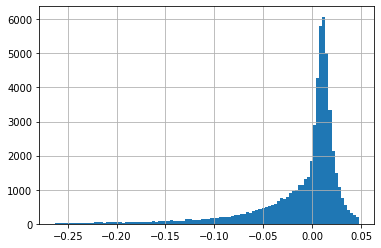

In [125]:
df_manufacturing[(df_manufacturing["epsp"] < df_manufacturing["epsp"].quantile(.975)) & (df_manufacturing["epsp"] > df_manufacturing["epsp"].quantile(.025))]["epsp"].hist(bins=100)

<AxesSubplot:>

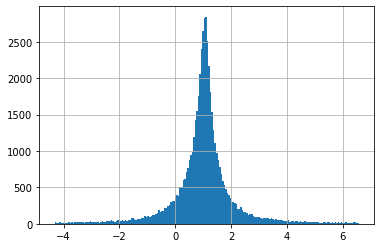

In [126]:
df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]["operatingprofitgrowth"].hist(bins=200)

<AxesSubplot:>

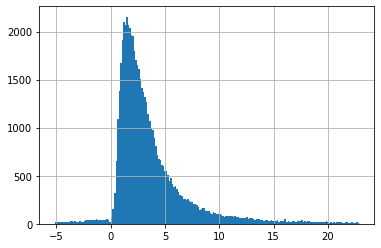

In [127]:
df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]["booktomarketratio"].hist(bins=200)

<AxesSubplot:>

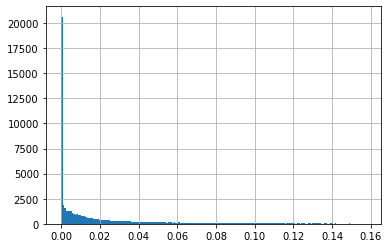

In [128]:

df_manufacturing[(df_manufacturing["shortfinancialleverage"] < df_manufacturing["shortfinancialleverage"].quantile(.95))]["shortfinancialleverage"].hist(bins=200)

0.04929354937503019 3.9268393022260484


count    57723.000000
mean        -0.011619
std          0.047474
min         -0.263523
25%         -0.020240
50%          0.006488
75%          0.014254
max          0.047910
Name: epsp, dtype: float64

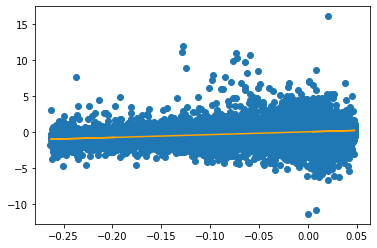

In [129]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["epsp"] < df_manufacturing["epsp"].quantile(.975)) & (df_manufacturing["epsp"] > df_manufacturing["epsp"].quantile(.025))]
x = tmp_df_manufacturing["epsp"]
y = tmp_df_manufacturing["f1"]

idx = np.isfinite(x) & np.isfinite(y)

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
x.describe()

-0.03958678687256242 0.030235187574137443


count    53897.000000
mean         1.011739
std          1.138931
min         -4.321930
25%          0.649889
50%          1.034103
75%          1.366339
max          6.580514
Name: operatingprofitgrowth, dtype: float64

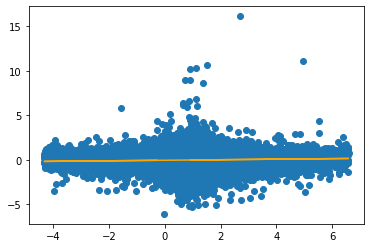

In [130]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["operatingprofitgrowth"] < df_manufacturing["operatingprofitgrowth"].quantile(.975)) & (df_manufacturing["operatingprofitgrowth"] > df_manufacturing["operatingprofitgrowth"].quantile(.025))]
x = tmp_df_manufacturing["operatingprofitgrowth"]
y = tmp_df_manufacturing["f1"]

idx = np.isfinite(x) & np.isfinite(y)

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
x.describe()

-0.13388809006219193 0.030530877748068737


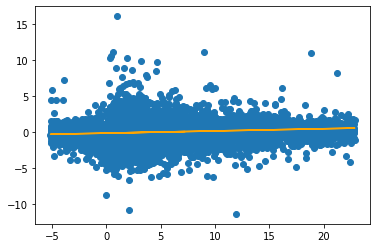

In [131]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["booktomarketratio"] < df_manufacturing["booktomarketratio"].quantile(.975)) & (df_manufacturing["booktomarketratio"] > df_manufacturing["booktomarketratio"].quantile(.025))]
x = tmp_df_manufacturing["booktomarketratio"]
y = tmp_df_manufacturing["f1"]

idx = np.isfinite(x) & np.isfinite(y)

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)
# df_manufacturing[["booktomarketratio", "ccstockreturns"]].describe()
# x.describe()

0.012439964815357462 -0.4758900456248817


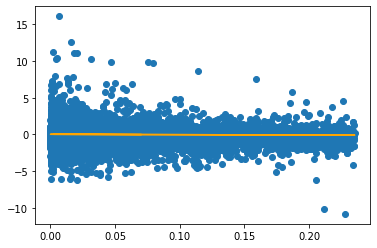

In [132]:
plt.clf()
tmp_df_manufacturing = df_manufacturing[(df_manufacturing["shortfinancialleverage"] < df_manufacturing["shortfinancialleverage"].quantile(.975)) & (df_manufacturing["shortfinancialleverage"] > df_manufacturing["shortfinancialleverage"].quantile(.025))]
x = tmp_df_manufacturing["shortfinancialleverage"]
y = tmp_df_manufacturing["f1"]
idx = np.isfinite(x) & np.isfinite(y) #para borrar un valor en y que hace que no funcione

b1,b0 = np.polyfit(x[idx],y[idx],1)
yfit = b0+b1*x

print(b0, b1)
plt.plot(x, yfit,c="orange")

plt.scatter(x,y)


In [133]:
df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage", "f1"]].describe()

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage,f1
count,60763.000000,56735.000000,61023.000000,63305.000000,63501.000000
mean,-4.395924,2.570802,16.652590,0.416422,-0.024128
std,1082.176043,90.334922,2299.721693,42.802702,0.865960
min,-266755.602988,-5905.955070,-23699.564982,0.000000,-11.363204
25%,-0.022871,0.612777,1.509223,0.000000,-0.283750
50%,0.006488,1.034103,2.646141,0.007433,0.055320
75%,0.014694,1.396721,4.646853,0.033235,0.311749
max,1138.852581,8774.386528,550728.543094,8570.124913,16.114070


### Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [134]:
df_manufacturing = df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage", "f1", "size_Medium", "size_Small"]].copy()
df_manufacturing

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage,f1,size_Medium,size_Small
firm,,,,,,,
A,NaN,NaN,NaN,NaN,NaN,0,0
A,0.004977,NaN,7.185493,0.069936,NaN,0,0
A,0.006992,NaN,4.522522,0.067459,NaN,0,0
A,0.012207,NaN,4.745690,0.098516,-1.219152,0,0
A,0.010971,NaN,2.533213,0.060382,-0.819441,0,0
...,...,...,...,...,...,...,...
ZYNE,-0.045596,0.450442,2.488284,0.002100,0.247615,0,1
ZYNE,-0.060502,1.106033,2.222813,0.002307,-0.136132,0,1
ZYNE,-0.074259,0.867208,1.673966,0.002576,-0.819027,0,1


	For each independent variable you have to check for outliers and do the corresponding adjustments to avoid unreliable results in your regression model

In [135]:
#winsorization
quantile97, quantile02 = df_manufacturing["epsp"].quantile(.975),  df_manufacturing["epsp"].quantile(.025)
df_manufacturing.loc[df_manufacturing["epsp"] > quantile97, "epsp"] = quantile97
df_manufacturing.loc[df_manufacturing["epsp"] < quantile02, "epsp"] = quantile02

quantile97, quantile02 = df_manufacturing["operatingprofitgrowth"].quantile(.975),  df_manufacturing["operatingprofitgrowth"].quantile(.025)
df_manufacturing.loc[df_manufacturing["operatingprofitgrowth"] > quantile97, "operatingprofitgrowth"] = quantile97
df_manufacturing.loc[df_manufacturing["operatingprofitgrowth"] < quantile02, "operatingprofitgrowth"] = quantile02

quantile97, quantile02 = df_manufacturing["booktomarketratio"].quantile(.975),  df_manufacturing["booktomarketratio"].quantile(.025)
df_manufacturing.loc[df_manufacturing["booktomarketratio"] > quantile97, "booktomarketratio"] = quantile97
df_manufacturing.loc[df_manufacturing["booktomarketratio"] < quantile02, "booktomarketratio"] = quantile02

quantile97, quantile02 = df_manufacturing["shortfinancialleverage"].quantile(.975),  df_manufacturing["shortfinancialleverage"].quantile(.025)
df_manufacturing.loc[df_manufacturing["shortfinancialleverage"] > quantile97, "shortfinancialleverage"] = quantile97
df_manufacturing.loc[df_manufacturing["shortfinancialleverage"] < quantile02, "shortfinancialleverage"] = quantile02

	You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test

Multicolinearidad se refiere a cuando uno o más pares de variables tienen una correlación muy alta, se vuelve un problema porque rompe la suposición de que cada una de las variables independientes confiere un poder explicativo extra

In [136]:
df_manufacturing.corr()

,epsp,operatingprofitgrowth,booktomarketratio,shortfinancialleverage,f1,size_Medium,size_Small
epsp,1.000000,0.005441,0.097934,-0.088309,0.298437,0.169869,-0.422041
operatingprofitgrowth,0.005441,1.000000,0.053929,-0.021948,0.040369,0.001720,-0.019867
booktomarketratio,0.097934,0.053929,1.000000,0.006460,0.114820,-0.018089,-0.155481
shortfinancialleverage,-0.088309,-0.021948,0.006460,1.000000,-0.039445,-0.078318,0.040581
f1,0.298437,0.040369,0.114820,-0.039445,1.000000,0.053838,-0.134145
size_Medium,0.169869,0.001720,-0.018089,-0.078318,0.053838,1.000000,-0.567043
size_Small,-0.422041,-0.019867,-0.155481,0.040581,-0.134145,-0.567043,1.000000


In [137]:
vif_info = pd.DataFrame()
temporal_df_manufacturing = df_manufacturing.copy()
temporal_df_manufacturing.dropna(inplace=True) #vif doesn't accept nan values
vif_info["feature"] = temporal_df_manufacturing.columns
vif_info["value"] = [vif(temporal_df_manufacturing.values, i) for i in range(len(temporal_df_manufacturing.columns))]
vif_info

,feature,value
0,epsp,1.465820
1,operatingprofitgrowth,1.288309
2,booktomarketratio,1.383328
3,shortfinancialleverage,1.248390
4,f1,1.167671
5,size_Medium,1.231423
6,size_Small,1.588538


LA CORRELACIÓN NO ES BASTANTE ELEVADA ENTRE NINGUNA VARIABLE. UNA CANTIDAD CONSERVADORA PARA ESTABLECER PROBLEMAS DE MULTICOLINEARIDAD EN EL VIF ES DE 2.5 LA CUAL NO SE CUMPLE EN NINGUNO DE LOS VALORES DE VIF. EL TEST NOS DICE QUE NO EXISTEN PROBLEMAS DE MULTICOLINEARIDAD

### Interpret your model

	Interpret the results of each coefficient (beta and their statistical significance)

In [138]:
x = df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage", "size_Medium", "size_Small"]].copy()
y = df_manufacturing["f1"].copy()

x = sm.add_constant(x)

model = sm.OLS(y, x, missing="drop").fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1537.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:16:11   Log-Likelihood:                -50749.
No. Observations:               54960   AIC:                         1.015e+05
Df Residuals:                   54953   BIC:                         1.016e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

TODOS LOS COEFICIENTES TIENEN UNA t MAYOR A 2 EXCEPTO size_Small. ALGUNOS COMO shortfinancialleverage y LA CONSTANTE TIENEN UN P MAYOR A 0 PERO IGUALMENTE AUN ASI ES UN VALOR PEQUEÑO. POR ESTAS DOS RAZONES SE PUEDE RECHAZAR CON BASTANTE CONFIANZA LA HIPÓTESIS NULA EN ESTAS VARIABLES. size_Small TIENE UN T PEQUEÑO Y UN P BASTANTE ELEVADO POR LO QUE NO ES SEGURO RECHAZAR LA HIPÓTESIS NULA CON CONFIANZA. 

SE PUEDE VER QUE TODOS LOS COEFICIENTES TIENEN UN VALOR POSITIVO EXCEPTO shortfinancialleverage Y LA CONSTANTE. EL COEFICIENTE NOS DICE LO QUE CAMBIARA LA DEPENDIENTE CADA VEZ QUE CAMBIE EN +1 LA INDEPENDIENTE. POR EJEMPLO SI EPSP AUMENTA EN 1, F1 AUMENTARÁ EN 3.73 (EL VALOR DEL COEFICIENTE). LA VARIABLE MÁS SIGNIFICATIVA ES epsp CON 79.5 EN t.

LAS VARIABLES CATEGÓRICAS DE TAMAÑO NOS INDICAN (SI LAS TOMAMOS COMO SIGNIFICATIVAS LO CUAL NO SE PUEDE HACER CON CONFIANZA POR size_Small) QUE UNA EMPRESA MEDIANA NOS OFRECERÁ EN PROMEDIO 3.7% DE RETORNOS COMPARADA CON LA GRANDE Y LA PEQUEÑA .19% COMPARADA CON LA GRANDE (SI LAS DEMÁS VARIABLES SE MANTIENEN CONSTANTES), ESTO NOS INDICA QUE LAS MEJORES EMPRESAS EN RETORNOS SON LAS MEDIANAS, LUEGO LAS PEQUEÑAS Y POR ÚLTIMO LAS GRANDES.

	Interpret the R-squared of the model

EL VALOR DE R AL CUADRADO ES DE 0.14 POR LO QUE ESTAS VARIABLES INDEPENDIENTES EXPLICAN EL 0.14 DE LA VARIABLE DEPENDIENTE. NO ES NÚMERO MUY GRANDE PERO ES UN NÚMERO SIGNIFICATIVO AÚN ASÍ Y MÁS CONSIDERANDO LO COMPLEJO QUE PUEDE LLEGAR A SER LA ECONOMÍA.

### Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.


SE VA A QUITAR EN ESTA SECCIÓN LA VARIABLE DE size_Small PORQUE TIENE UN P BASTANTE ELEVADO HASTA PARA ESTÁNDARES NO TAN CONSERVADORES, IGUALMENTE SE VA A QUITAR size_Medium PORQUE PIERDE SENTIDO SI NO TIENE size_Small

In [139]:
x = df_manufacturing[["epsp", "operatingprofitgrowth", "booktomarketratio", "shortfinancialleverage"]].copy()
y = df_manufacturing["f1"].copy()

x = sm.add_constant(x)

model = sm.OLS(y, x, missing="drop").fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2293.
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        08:16:12   Log-Likelihood:                -50770.
No. Observations:               54960   AIC:                         1.016e+05
Df Residuals:                   54955   BIC:                         1.016e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0